# House_price_prediction
## Dataset source - Kaggle
### Machine learning multiple linear regression model

In [1]:
!pip install sklearn

You should consider upgrading via the 'c:\users\anmol\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
# importing some of the libraries which we will use. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics # used for measuring the accuracy of model

In [3]:
# Reading our csv file
df =pd.read_csv('House_price_prediction.csv', index_col=False)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
# no missing values in our dataset

df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
# This states that we have 2 rows which is having 0 as a value in bedroom and bathroom category and 49 rows which contains 0 as a value in price category which is not possible 
df[df==0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

In [6]:
#co-relation between the different features
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [7]:
# for determining rows and columns
df.shape

(4600, 18)

In [8]:
# we are dropping some of the columns which we will not use further. 
df.drop(['date','street','city','statezip','country'],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [9]:
# I am dropping rows in price column in order to increase the model accuracy
df.drop(df[df['price'] == 0].index, inplace = True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [10]:
df.drop(df[df['bedrooms'] == 0].index, inplace = True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [11]:
# similarly with the bathrooms column 
df.drop(df[df['bathrooms'] == 0].index, inplace = True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [12]:
#Now we have no rows which has 0 value in price , bedrooms and bathroom column (removed because its not possible)
df[df==0].count()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       4519
view             4102
condition           0
sqft_above          0
sqft_basement    2716
yr_built            0
yr_renovated     2706
dtype: int64

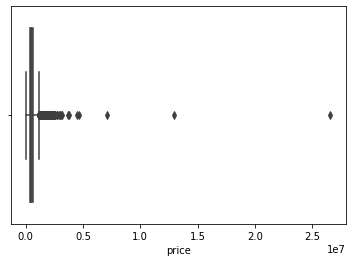

In [13]:
#For detection of outliers in price column
sns.boxplot(x=df['price'])

In [14]:
# Using IQR method for outlier detection and correction
Q1_price = df.price.quantile(0.25)
Q3_price = df.price.quantile(0.75)
IQR_price =Q3_price- Q1_price 

In [15]:
lower_limit_price= Q1_price - 1.5*IQR_price
upper_limit_price= Q3_price + 1.5*IQR_price

In [16]:
# Outliers
df[(df.price<lower_limit_price)|(df.price>upper_limit_price)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
11,1.400000e+06,4.0,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988
14,1.200000e+06,5.0,2.75,2910,9480,1.5,0,0,3,2910,0,1939,1969
99,1.395000e+06,5.0,3.50,4010,8510,2.0,0,1,5,2850,1160,1971,0
122,2.280000e+06,7.0,8.00,13540,307752,3.0,0,4,3,9410,4130,1999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,2.199900e+06,4.0,1.50,1120,5427,1.0,0,0,3,1120,0,1969,2014
4350,2.659000e+07,3.0,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0
4465,2.560498e+06,3.0,2.50,1710,1664,2.0,0,0,5,1300,410,2003,0
4467,1.337044e+06,4.0,3.50,4280,9583,2.0,0,0,3,4280,0,2005,0


In [17]:
#our new df after removing outliers from price column
new_df = df[(df.price>lower_limit_price)&(df.price<upper_limit_price)]
new_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


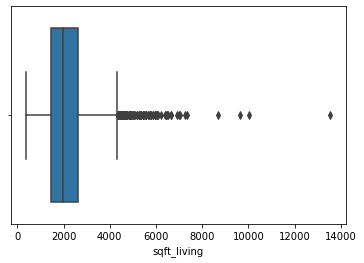

In [18]:
# for visulaizing outliers
sns.boxplot(x=df['sqft_living'])

In [19]:
Q1_sqft_living = df.sqft_living.quantile(0.25)
Q3_sqft_living = df.sqft_living.quantile(0.75)
IQR_sqft_living =Q3_sqft_living- Q1_sqft_living
lower_limit_sqft_living= Q1_sqft_living - 1.5*IQR_sqft_living
upper_limit_sqft_living= Q3_sqft_living + 1.5*IQR_sqft_living

In [20]:
#outliers
df[(df.sqft_living<lower_limit_sqft_living)|(df.sqft_living>upper_limit_sqft_living)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
107,1090000.0,4.0,2.50,4340,141570,2.5,0,0,3,4340,0,1992,0
122,2280000.0,7.0,8.00,13540,307752,3.0,0,4,3,9410,4130,1999,0
143,890000.0,4.0,4.25,4420,5750,2.0,0,0,3,3410,1010,2006,0
148,890000.0,5.0,3.50,4490,6000,2.0,0,0,3,3200,1290,2006,0
217,1870000.0,5.0,4.00,4510,15175,2.0,0,0,3,4510,0,1969,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,1240000.0,5.0,3.50,5430,10327,2.0,0,2,3,4010,1420,2007,0
4283,1550000.0,5.0,4.25,6070,171626,2.0,0,0,3,6070,0,1999,0
4398,195000.0,5.0,3.75,5340,10655,2.5,0,3,4,3740,1600,1912,1989
4400,692000.0,4.0,3.25,5010,34460,2.0,0,0,3,5010,0,1988,2000


In [21]:
# our new df after removing outliers from sqft_living column
new_df2 = new_df[(new_df.sqft_living>lower_limit_sqft_living)&(new_df.sqft_living<upper_limit_sqft_living)]
new_df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


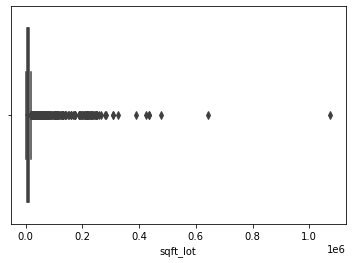

In [22]:
#for visualizing outliers in sqft_lot cokumn 
sns.boxplot(x=df['sqft_lot'])

In [23]:
Q1_sqft_lot = df.sqft_lot.quantile(0.25)
Q3_sqft_lot = df.sqft_lot.quantile(0.75)
IQR_sqft_lot =Q3_sqft_lot- Q1_sqft_lot
lower_limit_sqft_lot= Q1_sqft_lot - 1.5*IQR_sqft_lot
upper_limit_sqft_lot= Q3_sqft_lot + 1.5*IQR_sqft_lot

In [24]:
#outliers
df[(df.sqft_lot<lower_limit_sqft_lot)|(df.sqft_lot>upper_limit_sqft_lot)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
7,482000.000000,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0
8,452500.000000,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0
28,675000.000000,5.0,2.50,2820,67518,2.0,0,0,3,2820,0,1979,2014
34,400000.000000,4.0,2.50,3630,42884,1.5,0,0,3,2300,1330,1979,2014
35,604000.000000,3.0,2.50,3240,33151,2.0,0,2,3,3240,0,1995,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4526,180785.714286,2.0,1.00,2550,21675,1.0,0,1,4,1610,940,1958,1972
4544,677099.565217,4.0,2.50,2150,27540,2.0,0,0,3,2150,0,1997,0
4545,405125.000000,4.0,2.75,4230,31747,2.0,0,0,4,4230,0,1985,0
4553,677099.565217,4.0,2.50,2540,38677,2.0,0,0,3,2540,0,1987,2000


In [25]:
# our new df after removing outliers from sqft_lot column
new_df3 = new_df2[(new_df2.sqft_lot>lower_limit_sqft_lot)&(new_df2.sqft_lot<upper_limit_sqft_lot)]
new_df3

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


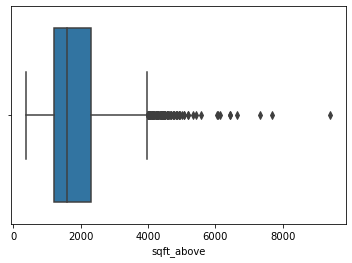

In [26]:
#for visualizing outliers in sqft_above column
sns.boxplot(x=df['sqft_above'])

In [27]:
#our new df after dropping outliers from sqft_above column
Q1_sqft_above = df.sqft_above.quantile(0.25)
Q3_sqft_above = df.sqft_above.quantile(0.75)
IQR_sqft_above =Q3_sqft_above- Q1_sqft_above
lower_limit_sqft_above= Q1_sqft_above - 1.5*IQR_sqft_above
upper_limit_sqft_above= Q3_sqft_above + 1.5*IQR_sqft_above
new_df4 = new_df3[(new_df3.sqft_above>lower_limit_sqft_above)&(new_df3.sqft_above<upper_limit_sqft_above)]
new_df4

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


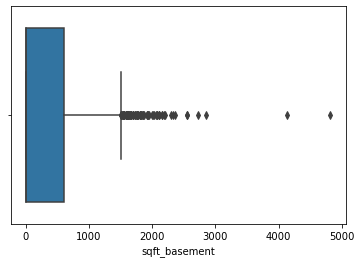

In [28]:
# for visualizing outliers in sqft_basement column 
sns.boxplot(x=df['sqft_basement'])                              

In [29]:
# our new df after dropping outliers from sqft_basement column
Q1_sqft_basement = df.sqft_basement.quantile(0.25)
Q3_sqft_basement = df.sqft_basement.quantile(0.75)
IQR_sqft_basement =Q3_sqft_basement- Q1_sqft_basement
lower_limit_sqft_basement= Q1_sqft_basement - 1.5*IQR_sqft_basement
upper_limit_sqft_basement= Q3_sqft_basement + 1.5*IQR_sqft_basement
final_df = new_df4[(new_df4.sqft_basement>lower_limit_sqft_basement)&(new_df4.sqft_basement<upper_limit_sqft_basement)]
final_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [30]:
# Independent variables in x 
x=final_df.drop('price', axis=1)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [31]:
# target variable (Dependent variable) will be in y
y=final_df['price']
y


0       313000.000000
2       342000.000000
3       420000.000000
4       550000.000000
5       490000.000000
            ...      
4595    308166.666667
4596    534333.333333
4597    416904.166667
4598    203400.000000
4599    220600.000000
Name: price, Length: 3757, dtype: float64

In [32]:
# Here i will split my dataset into trainning dataset and testing dataset!
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [33]:
# now we will make a object
obj =LinearRegression()

In [34]:
#now we will train our model with the help of fit function 
obj.fit(x_train, y_train)

LinearRegression()

In [35]:
# These are the coefficents or we can say the value of m for eacch independent variable
obj.coef_

array([-3.46203315e+04,  4.37331676e+04,  1.25646212e+02, -6.95448005e+00,
        3.97555988e+04,  1.40650225e+05,  3.81137649e+04,  3.06994949e+04,
        7.07483867e+01,  5.48978254e+01, -1.78235244e+03,  5.25171604e+00])

In [36]:
# this is our intercept value
obj.intercept_

3508343.778576204

In [37]:
# we will predict the values using predict function. we will get predicted values 
prediction = obj.predict(x_test)
prediction

array([427246.060729  , 500968.33844315, 289428.35772705, ...,
       752200.52972509, 631118.6147655 , 664792.39886426])

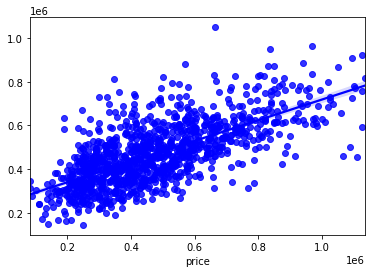

In [38]:
# Note: the actual values are stored  in y_test and predicted values in prediction variable
# we will use the regplot in order to visualize
# Advantage of using regplot over scatter plot is we dont have to write extra code for the line generation in graph.
sns.regplot(y_test, prediction, color='Blue')

## This graph shows that how our actual values and predicted values are distanced from each other

In [39]:
# We are calculating mean squared error in our model andstoring it into MSE variable
MSE = metrics.mean_squared_error(y_test, prediction)
MSE

22622315789.284985

In [40]:
# now for root mean squared error i.e. RMSE we will just square root our previous result using numpy
RMSE= np.sqrt(MSE)
RMSE

150407.16668192705

In [41]:
# for model accuracy we can use score function
model_accuracy =obj.score(x_train, y_train)
print(model_accuracy)


0.46704558005194063


## Which  means my model has 46% of accuracy which is  the bad one.